In [1]:
from turb.lesgo_utils import read_array_from_file
import numpy as np
from turb.lesgo_utils import lesgo_data
from scipy.interpolate import interpn
from pyutils.cartesian import coords_xyz
import pyutils.plot_utils as plt_utils

In [3]:
def read_velocity_inputs(self:lesgo_data, dir, in_dims = None):
    """_summary_

    Args:
        dir (_type_): folder that store the initial condition.
        in_dims (_type_, optional): Dimension of read in initial condition. Defaults to None.
    """

    
    u_icf = dir + '/u_velocity.IC'
    v_icf = dir + '/v_velocity.IC'
    w_icf = dir + '/w_velocity.IC'


    if in_dims == None:
        self.data['u_ic'] = read_array_from_file(u_icf, self.dims)
        self.data['v_ic'] = read_array_from_file(v_icf, self.dims)
        self.data['w_ic'] = read_array_from_file(w_icf, self.dims)
    else:
        u_ic = read_array_from_file(u_icf, in_dims)
        v_ic = read_array_from_file(v_icf, in_dims)
        w_ic = read_array_from_file(w_icf, in_dims)
        
        in_coords = coords_xyz(self.domain, in_dims, center=False, stretch=True)
        points = np.array([np.meshgrid(*self.coords, indexing="ij")[ind].reshape(-1) for ind in range(3)])
        
        self.data['u_ic'] = interpn(in_coords, u_ic, points.T).reshape(*self.dims)
        self.data['v_ic'] = interpn(in_coords, v_ic, points.T).reshape(*self.dims)
        self.data['w_ic'] = interpn(in_coords, w_ic, points.T).reshape(*self.dims)
        
    return 0

In [4]:
root_dir = '/home/zyou6474/tasks/source_inversion_Re395/forward'
dims = [256, 192, 96]
domain = [2*np.pi, np.pi, 1]
ldata = lesgo_data(domain, dims, root_dir, ntheta=1)
ldata.set_adjoint(False, fmt_ntheta='%.3i')
read_velocity_inputs(ldata, '/home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/turbulence_128_128_64', in_dims=[128, 128, 64])

0

maximum index = [118, 140, 94]


(<Figure size 800x400 with 4 Axes>,
 [<Axes: xlabel='x', ylabel='y'>,
  <Axes: xlabel='x', ylabel='z'>,
  <Axes: xlabel='y', ylabel='z'>])

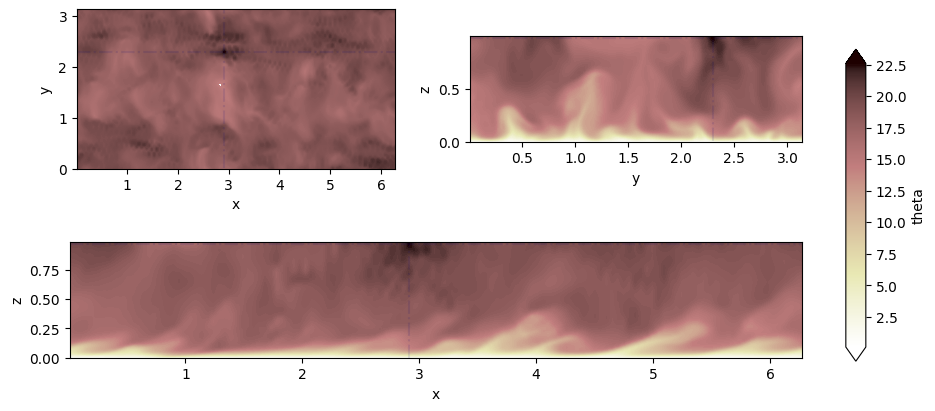

In [5]:
plt_utils.contour_channel(ldata.coords, ldata.data['u_ic'])

# Test

In [1]:
%reset
from turb.lesgo_utils import read_array_from_file
import numpy as np
from turb.lesgo_utils import lesgo_data
from pyutils.cartesian import coords_xyz
import pyutils.plot_utils as plt_utils

In [2]:
root_dir = '/home/zyou6474/tasks/source_inversion_Re395/forward'
dims = [256, 192, 96]
domain = [2*np.pi, np.pi, 1]
ldata = lesgo_data(domain, dims, root_dir, ntheta=1)
ldata.set_adjoint(False, fmt_ntheta='%.3i')
ldata.read_inputs('/home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/turbulence_128_128_64', in_dims=[128, 128, 64])

maximum index = [118, 140, 94]


(<Figure size 800x400 with 4 Axes>,
 [<Axes: xlabel='x', ylabel='y'>,
  <Axes: xlabel='x', ylabel='z'>,
  <Axes: xlabel='y', ylabel='z'>])

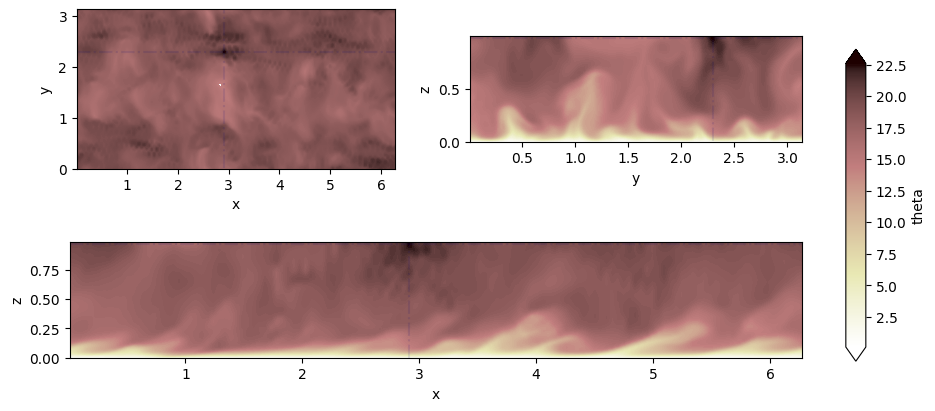

In [3]:
plt_utils.contour_channel(ldata.coords, ldata.data['u_ic'])